# Otsu's Binarization


In [65]:
#Importing library
import skimage
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

In [73]:
#Within class variance implementation
def within_class(img):
    x = np.array(range(0, 256))
    #print(img.shape)
    h, w = img.shape
    histo = histogram_computation(img)
    histo_n = np.divide(histo, h*w)
    #v_w = within class variance
    # w_0 = Class 0 probability
    # w_1 = Class 1 probability
    # u_0p, u_0 = Class 0 mean
    # u_1p, u_1 = Class 1 mean
    # v_0p, v_0 = Class 0 variance
    # v_1p, v_1 = Class 1 variance
    v_w = []
    s_w = 0
    Threshold = 0
    for k in range(256):
        w_0 = 0
        w_1 = 0
        u_0p = 0
        u_1p = 0
        u_0 = 0
        u_1 = 0
        v_0p = 0
        v_1p = 0
        v_0 = 0
        v_1 = 0

        for i in range(Threshold+1):
            w_0 = w_0 + histo_n[i]
            u_0p = u_0p + i * histo_n[i]

        for j in range(Threshold+1, 256) :
            w_1 = w_1 + histo_n[j]
            u_1p = u_1p + j * histo_n[j]

        if w_0==0:
            u_0 = u_0p
        else:
            u_0 = u_0p/w_0
        if w_1 == 0:
            u_1 = u_1p
        else:
            u_1 = u_1p/w_1

        for l in range(Threshold + 1):
            v_0p = v_0p + ((l-u_0)**2) * histo_n[l]
        for m in range(Threshold + 1, 256):
            v_1p = v_1p + ((m-u_1)**2) * histo_n[m]

        if w_0==0:
            v_0 = v_0p
        else:
            v_0 = v_0p/w_0
        if w_1 == 0:
            v_1 = v_1p
        else:
            v_1 = v_1p/w_1

        s_w = w_0 * v_0 + v_1 * w_1
        v_w.append(s_w)
        Threshold=Threshold+1
    return(v_w)

In [80]:
#Between class variance implementation
def between_class(img):
    h, w = img.shape
    histo = histogram_computation(img)
    histo_n = np.divide(histo, h * w)
    
    #v_b = Between class variance
    v_b = []
    s_b = 0
    Threshold = 0
    # w_0 = Class 0 probability
    # w_1 = Class 1 probability
    # u_0p, u_0 = Class 0 mean
    # u_1p, u_1 = Class 1 mean
    # v_0p, v_0 = Class 0 variance
    # v_1p, v_1 = Class 1 variance

    for k in range(256):
        w_0 = 0
        w_1 = 0
        u_0p = 0
        u_1p = 0
        u_0 = 0
        u_1 = 0
        v_0p = 0
        v_1p = 0
        v_0 = 0
        v_1 = 0

        for i in range(Threshold + 1):
            w_0 = w_0 + histo_n[i]
            u_0p = u_0p + i * histo_n[i]

        for j in range(Threshold + 1, 256):
            w_1 = w_1 + histo_n[j]
            u_1p = u_1p + j * histo_n[j]

        if w_0 == 0:
            u_0 = u_0p
        else:
            u_0 = u_0p / w_0
        if w_1 == 0:
            u_1 = u_1p
        else:
            u_1 = u_1p / w_1

        for l in range(Threshold + 1):
            v_0p = v_0p + ((l - u_0) ** 2) * histo_n[l]
        for m in range(Threshold + 1, 256):
            v_1p = v_1p + ((m - u_1) ** 2) * histo_n[m]

        if w_0 == 0:
            v_0 = v_0p
        else:
            v_0 = v_0p / w_0
        if w_1 == 0:
            v_1 = v_1p
        else:
            v_1 = v_1p / w_1

        s_b = w_0 * w_1 * (u_0 - u_1) ** 2
        v_b.append(s_b)
        Threshold = Threshold + 1
    return v_b

In [81]:
def otsu_binarization(img,Threshold):
    img2 = img > Threshold
    return img2

In [82]:
def binarization_2():
    img = skimage.io.imread('coins.png')
    var_within_c = within_class(img)
    var_between_c = between_class(img)
    var_img = image_variance(img)

    plt.figure(3)
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.6)
    plt.subplot(221)
    plt.xlabel('Intensity')
    plt.ylabel('Variance')
    plt.title("Within class variance")
    plt.bar(x, var_within_c, width=1)
    plt.subplot(222)
    plt.xlabel('Intensity')
    plt.title("Between class variance")
    plt.bar(x, var_between_c, width=1)
    plt.subplot(223)
    plt.xlabel('Intensity')
    plt.title("Image variance")
    plt.bar(x, var_img, width=1)
    plt.show()

    Threshold_w = var_within_c.index(min(var_within_c))
    Threshold_b = var_between_c.index(max(var_between_c))
    print("Minimum of within-class variance is located at",Threshold_w)
    print("Maximum of between-class variance is located at", Threshold_b)

    #Binarization
    binarized_image = otsu_binarization(img,Threshold_w)

    plt.figure(4)
    plt.subplot(121)
    plt.title("Gray scale image")
    plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    plt.subplot(122)
    plt.title("Binarized Image")
    plt.imshow(binarized_image, cmap="gray")
    plt.show()


In [83]:
def histogram_computation(img2):
    arr2 = [0]*256
    img1 = np.array(img2,int)
    for _ in img1:
        for i in _:
            arr2[i] = arr2[i]+1
    return arr2

In [84]:
#Image variance computation
def image_variance(img):
    h, w = img.shape
    histo = histogram_computation(img)
    histo_n = np.divide(histo, h * w)
    u_t = 0
    v_t = 0
    for k in range(256):
        u_t = u_t + k * histo_n[k]
        v_t = v_t + (k - u_t) ** 2 * histo_n[k]
    return v_t

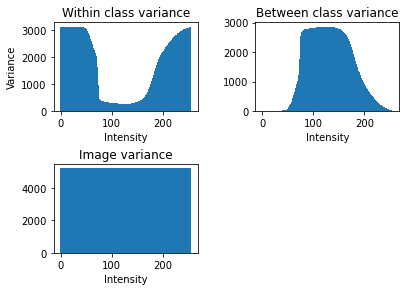

Minimum of within-class variance is located at 125
Maximum of between-class variance is located at 125


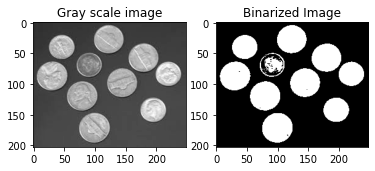

In [85]:
x = np.array(range(0, 256))
binarization_2()